In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading the CSV file and printing the first 5 columns and a description of the data. From the Data description we can figure out the range and other statistics of age, annual income and the spending score of the customers

In [0]:
data= pd.read_csv('assignment_shala_clustering.csv')
print(data.head(),"\n \n \n")
data.describe()


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40 
 
 



,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


From the data.describe() , it can be seen that mean Age of our customes is 38 and almost 75% of them are below the age of 50. Similarly for annual income , the mean value is 60 and 75% below 79 . Similar conclusion about the statistical measures for Spending Score can be made. 

   Gender  Age  Annual_Income  Spending_Score
0    Male   19             15              39
1    Male   21             15              81
2  Female   20             16               6
3  Female   23             16              77
4  Female   31             17              40


Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

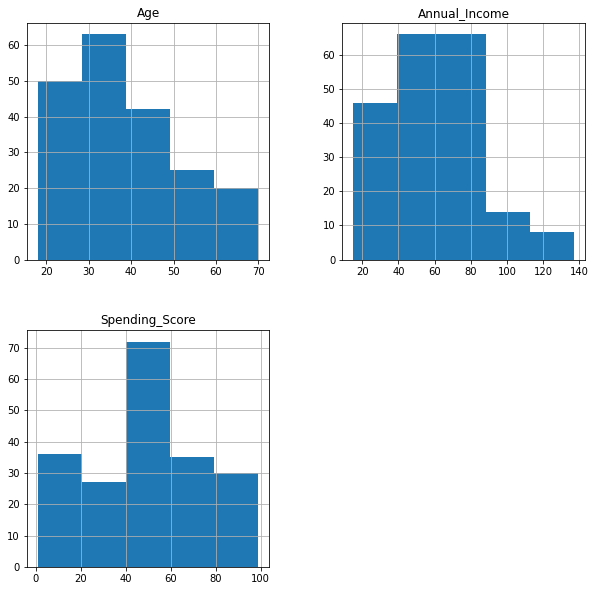

In [0]:
df=data.drop(['CustomerID'],axis=1)
df.columns=['Gender' ,'Age' , 'Annual_Income' , 'Spending_Score']  # Renaming columns for ease
print(df.head()) 
df.hist(figsize=(10,10),bins=5)
df.isnull().sum()


In [0]:
df=pd.get_dummies(df, columns=['Gender'],drop_first=True)
print(df.head())


   Age  Annual_Income  Spending_Score  Gender_Male
0   19             15              39            1
1   21             15              81            1
2   20             16               6            0
3   23             16              77            0
4   31             17              40            0


0    112
1     88
Name: Gender_Male, dtype: int64

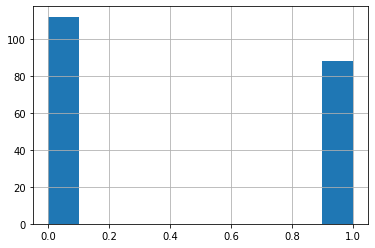

In [0]:
df['Gender_Male'].hist()
df['Gender_Male'].value_counts()

In [0]:
Spend_Score = ['Very Low','Low','Medium','High','Very High']
cut_bins = [0,20,40,60,80,100]
df['Spend_Score_Cat'] = pd.cut(df['Spending_Score'], bins=cut_bins, labels=Spend_Score)


Age_Bin = ['20s','30s','40s','50s','>60s']
cut_bins = [0,20,30,40,50,100]
df['Age_Bins'] = pd.cut(df['Age'], bins=cut_bins, labels=Age_Bin)




In [0]:
print(pd.crosstab(df['Gender_Male'],df['Spend_Score_Cat']))

Spend_Score_Cat  Very Low  Low  Medium  High  Very High
Gender_Male                                            
0                      14   20      43    19         16
1                      22    7      32    13         14


Text(0, 0.5, 'Income')

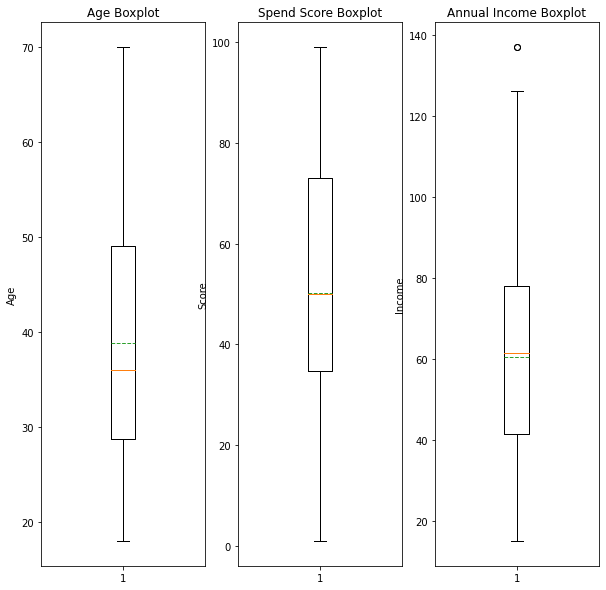

In [0]:
plt.figure(figsize=[10,10])

plt.subplot(131)
plt.boxplot(x=df['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age')

plt.subplot(132)
plt.boxplot(df['Spending_Score'], showmeans = True, meanline = True)
plt.title('Spend Score Boxplot')
plt.ylabel('Score')

plt.subplot(133)
plt.boxplot(df['Annual_Income'], showmeans = True, meanline = True)
plt.title('Annual Income Boxplot')
plt.ylabel('Income')

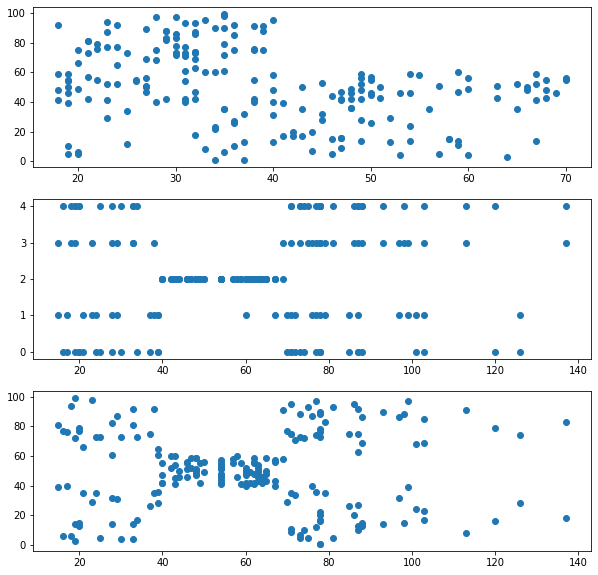

In [0]:
plt.figure(figsize=[10,10])
plt.subplot(311)
plt.scatter(df['Age'],df['Spending_Score'])
plt.subplot(312)
plt.scatter(df['Annual_Income'],df['Spend_Score_Cat'])
plt.subplot(313)
plt.scatter(df['Annual_Income'],df['Spending_Score'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


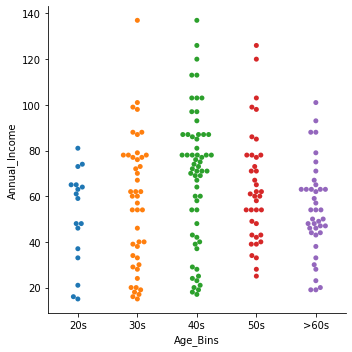

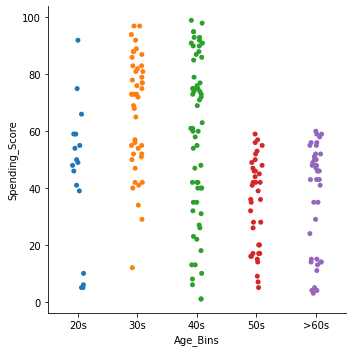

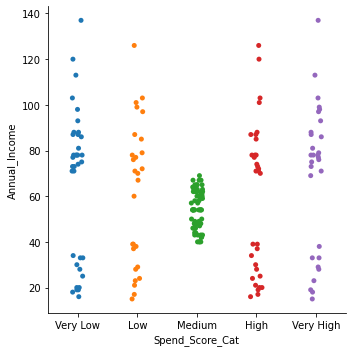

In [0]:
import seaborn as sns


sns.catplot(x="Age_Bins", y="Annual_Income", data=df,kind="swarm");
sns.catplot(x="Age_Bins", y="Spending_Score", data=df);
sns.catplot(x="Spend_Score_Cat", y="Annual_Income", data=df);
#sns.barplot(x = 'Age', y = 'Spend_Score_Cat', data=df)

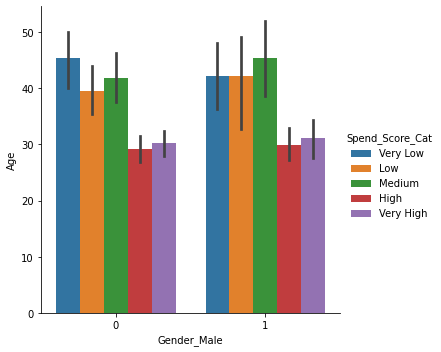

In [0]:
sns.catplot(x="Gender_Male", y="Age", hue="Spend_Score_Cat", kind="bar", data=df);

In [0]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [0]:
labelEncoder = LabelEncoder()
labelEncoder.fit(df['Age_Bins'])
df['Age_Bins'] = labelEncoder.transform(df['Age_Bins'])
labelEncoder.fit(df['Spend_Score_Cat'])
df['Spend_Score_Cat'] = labelEncoder.transform(df['Spend_Score_Cat'])
print(df.head())
train=df.drop(['Age_Bins','Spend_Score_Cat'],axis=1)

   Age  Annual_Income  Spending_Score  Gender_Male  Spend_Score_Cat  Age_Bins
0   19             15              39            1                1         0
1   21             15              81            1                3         1
2   20             16               6            0                4         0
3   23             16              77            0                0         1
4   31             17              40            0                1         2


In [0]:
print(train.head())
X= train.drop('Spending_Score',axis=1)


   Age  Annual_Income  Spending_Score  Gender_Male
0   19             15              39            1
1   21             15              81            1
2   20             16               6            0
3   23             16              77            0
4   31             17              40            0


Text(0.5, 1.0, 'Elbow Diagram')

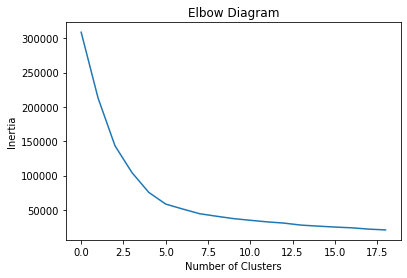

In [0]:
inertia=[]
for i in range(1,20):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(train)
  inertia.append(kmeans.inertia_)

plt.plot(inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Diagram')

In [0]:
kmeans = KMeans(n_clusters=5) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[45.2173913  26.30434783 20.91304348  0.39130435]
 [43.08860759 55.29113924 49.56962025  0.41772152]
 [40.66666667 87.75       17.58333333  0.52777778]
 [32.69230769 86.53846154 82.12820513  0.46153846]
 [25.52173913 26.30434783 78.56521739  0.39130435]]
[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 2 3 1 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 1 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


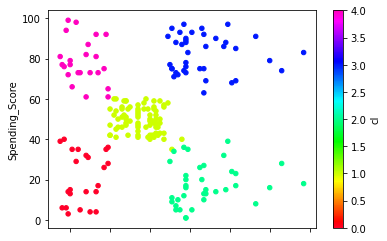

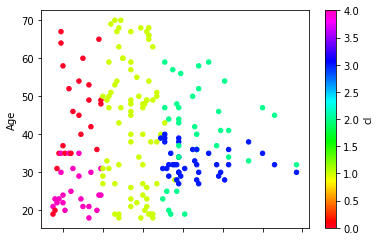

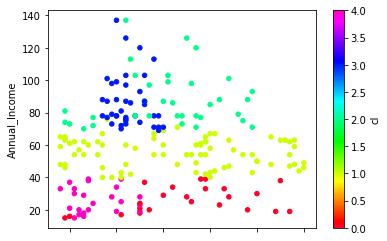

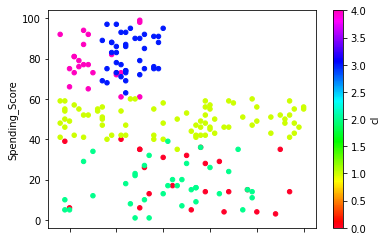

In [0]:
df['cl'] = kmeans.labels_
df.plot.scatter('Annual_Income', 'Spending_Score', c='cl', colormap='gist_rainbow')
df.plot.scatter('Annual_Income', 'Age', c='cl', colormap='gist_rainbow')
df.plot.scatter('Age', 'Annual_Income', c='cl', colormap='gist_rainbow')
df.plot.scatter('Age', 'Spending_Score', c='cl', colormap='gist_rainbow')